# NetworkX: Network Analysis in Python

[NetworkX](https://networkx.github.io/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

- Data structures for graphs, digraphs, and multigraphs
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- Nodes can be "anything" (e.g., text, images, XML records)
- Edges can hold arbitrary data (e.g., weights, time-series)

## Let's install necessary libraries

In [1]:
!python3 -m pip install --user networkx
#for graph plottinh
!python3 -m pip install --user  matplotlib

# need graphviz on your machine
#!sudo apt-get install graphviz libgraphviz-dev graphviz-dev pkg-config
#!brew install graphviz . You may need to do python3 -m pip install --install-option="--include-path=/usr/local/include/" --install-option="--library-path=/usr/local/lib/" pygraphviz

!python3 -m pip install --user pygraphviz 

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.
Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.
Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [2]:
import networkx as nx
print(nx.__version__)

import matplotlib.pyplot as plt
import numpy as np

2.5


### Some functions to plot graphs

In [3]:
from networkx.drawing.nx_agraph import graphviz_layout

def plot_graph(G):
    nx.draw(G, with_labels = True)  
    plt.show()
    
def plot_graph_with_weights(G):
    pos = nx.planar_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

def plot_tree(tree):
    pos = graphviz_layout(tree, prog='dot')
    nx.draw(tree, pos, with_labels=True)
    plt.show()
    
def plot_graph_and_highlight_dijistra(G, path):
    pos = graphviz_layout(G)
    nx.draw(G, pos, with_labels = True)

    nx.draw_networkx_nodes(G, pos, nodelist=path,node_color='r', with_labels=True)
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=4)
    plt.show()

---

## Create a Graph

A graph is a __collection of nodes and edges__, *i.e.*, G = (V, E). Let us create an empty graph

Let's start by creating an empty graph

In [4]:
G = nx.Graph()

Now let's __populate__ the graph. We can add one node at time using *G.add_node()* or add any iterable collections (lists, strings etc..) with *G.add_nodes_from*. 

We are now using strings as nodes's names, but nodes can be any hashable object.

In [5]:
G.add_node('a')
my_list = ['b', 'c', 'd']
G.add_nodes_from(my_list)

We can __inspect the nodes__ in a graph using *G.nodes()*.

In [6]:
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

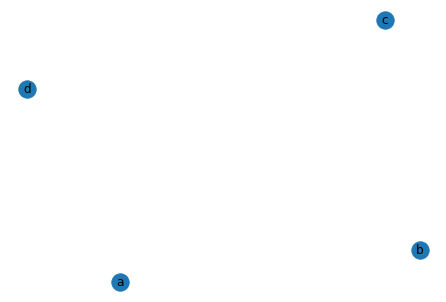

In [7]:
plot_graph(G)

Now let us __add edges__ to the graph. 

We can add one edge at time with *G.add_edge()*, specifying the nodes between whom we want the edge to stay. As for nodes, we can pass an iterable colletion to *G.add_edges_from()*.

In [8]:
G.add_edges_from([('a', 'b'), ('a', 'c'), ('c', 'd'), ('b', 'd')])
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'd')])

If we add edges between nodes that does not exist, __nodes are automatically added__

In [9]:
G.add_edge("a", "e")

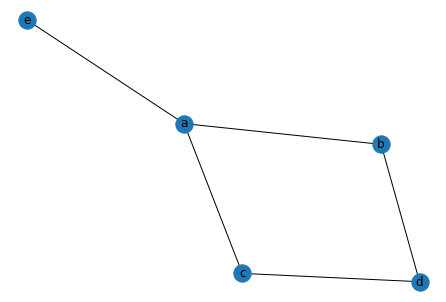

In [10]:
plot_graph(G)

__Remove__ nodes and/or edges using the *G.remove_node()* or the *G.remove_nodes_from()*

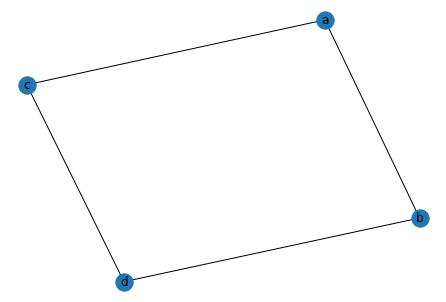

In [11]:
G.remove_node('e')
plot_graph(G)

---
## Graph properties


NewtorkX provides direct access to several __graph properties__

In [12]:
# Number of nodes
print("Number of Nodes: ", G.order ()) # equivalent to len(G) and G.number_of_nodes()
# Number of edges
print("Number of Edges: ", G.number_of_edges())

Number of Nodes:  4
Number of Edges:  4


Nodes can be listed with G.nodes.

In [13]:
G.nodes

NodeView(('a', 'b', 'c', 'd'))

We can assign nodes some attributes, e.g., a color.

In [14]:
for node in G.nodes:
    G.nodes[node]['color'] = 'white'

In [15]:
list(G.nodes.data())

[('a', {'color': 'white'}),
 ('b', {'color': 'white'}),
 ('c', {'color': 'white'}),
 ('d', {'color': 'white'})]

In [16]:
G.nodes['a']['color']

'white'

We can explore the **neighbours** and the **degree** of the nodes in a graph using the facilities *G.adj* and *G.degree*.

In [17]:
print(G.adj)
print(G.adj['a'])

{'a': {'b': {}, 'c': {}}, 'b': {'a': {}, 'd': {}}, 'c': {'a': {}, 'd': {}}, 'd': {'c': {}, 'b': {}}}
{'b': {}, 'c': {}}


Graph are __subscriptable__ objects and we can access neighbours directly with the [ ] operator.

In [18]:
print(G.adj['a'])
print(G['a'])

{'b': {}, 'c': {}}
{'b': {}, 'c': {}}


We may want to add some edges properties.

In [19]:
G['a']['c']['color'] = 'green'
G['a']['b']['color'] = 'black'

We can use *G.adj* as a dictionary and __iterate__ over it.

In [20]:
for node, datadict in G.adj.items():
    # datadict is a dictionary whose keys are node neighbours and whose value, in turn, is a dictionary 
    # reporting 'property:value' of the edge between node and key
    
    print(node, datadict) 

a {'b': {'color': 'black'}, 'c': {'color': 'green'}}
b {'a': {'color': 'black'}, 'd': {}}
c {'a': {'color': 'green'}, 'd': {}}
d {'c': {}, 'b': {}}


The degree property reports the number of edges for each node.

In [21]:
print(G.degree)

[('a', 2), ('b', 2), ('c', 2), ('d', 2)]


In [22]:
G.add_edge(1,2, weight = 1.0)
G.edges().data()

EdgeDataView([('a', 'b', {'color': 'black'}), ('a', 'c', {'color': 'green'}), ('b', 'd', {}), ('c', 'd', {}), (1, 2, {'weight': 1.0})])

---
## Directed Graphs

Networkx supports directed graphs.

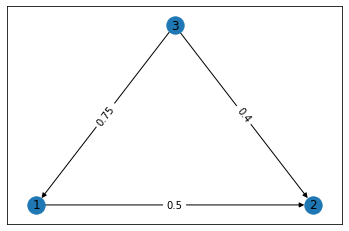

In [23]:
DG = nx.DiGraph()
#we add nodes and edges as a list oftriplets (or_node, dest_node, weight)
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (3,2, 0.4)]) 
plot_graph_with_weights(DG)

In [24]:
print("Successor of node 1: Node", list(DG.successors(1))[0]) #Equivalent to DG.neighbors for directed graphs
print("Predecssor of node 1 : Node", list(DG.predecessors(1))[0])

Successor of node 1: Node 2
Predecssor of node 1 : Node 3


We can __convert__ directed graphs to undirected one and viceversa.


In [25]:
G = nx.to_undirected(DG)
DG = nx.to_directed(G)

---
## Graph Operations

Networkx supports most common graph operations. Some examples are 
<ul>
<li>Union</li>
<li>Intersection</li>
<li>Complement</li>
</ul>

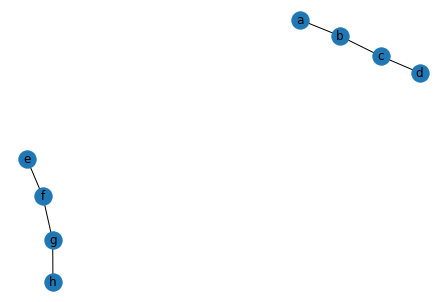

In [26]:
# Create a first graph G
G = nx.Graph()
G.add_edges_from([("a", "b"), ("b", "c"), ("c", "d")])

# Create a second graph H
H = nx.Graph()
H.add_edges_from([("e", "f"), ("f", "g"), ("g", "h") ])

# Perform the union operation
I = nx.union(G, H)
plot_graph(I)

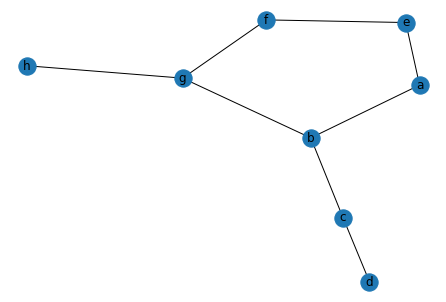

In [27]:
# Now link the two connected components
I.add_edges_from([("a","e"), ("b", "g")])
plot_graph(I)

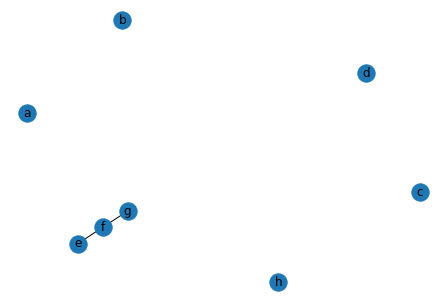

In [28]:
# Create a third graph
L = nx.Graph()

# To perform intersection between two graphs, they must have the same nodes
# First we copy all the nodes in I into L
L.add_nodes_from(I.nodes())

# Then we add some edge in L
L.add_edges_from([("e", "f"), ("f", "g")])

M = nx.intersection(I, L)

# Only the shared edges between I, L wil survive this operation
plot_graph(M)

---
## Graph Search

Several algorithm are already implemented in NetworkX, take a look [here](https://networkx.github.io/documentation/stable/reference/algorithms/index.html).

### Breadth First Search (BFS)

With Networkx it is easy to perform  graph search. Let us start with __BFS__. 

We will use a __Petersen__ graph as an example, a graph with 10 nodes and 15 edges.

Number of nodes 10
Number of edges 15


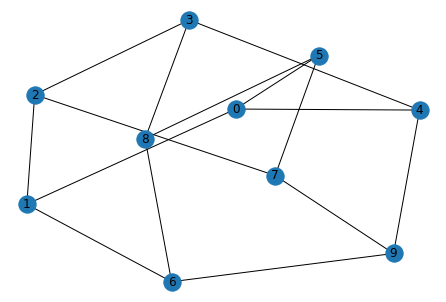

In [29]:
petersen = nx.petersen_graph()
print("Number of nodes", petersen.order())
print("Number of edges", petersen.number_of_edges())
plot_graph(petersen)

Networkx offers several __methods__ to perform BFS. Observe that in the method definition, the arguments in square brackets [ ]  are optional.

- bfs_edges(G, source, [reverse, depth_limit]):  returns an iterator over edges in a breadth-first-search starting at source, until depth_limit
- bfs_tree(G, source, [reverse, depth_limit]): returns an oriented tree constructed from of a breadth-first-search starting at source
- bfs_predecessors(G, source, [depth_limit]): returns an iterator of predecessors in breadth-first-search from source
- bfs_successors(G, source, [depth_limit]): returns an iterator of successors in breadth-first-search from source         

In [30]:
# We use 0 as source node. 
edges_bfs = list(nx.bfs_edges(petersen, 0))
print("Result of BFS on edges:", edges_bfs)

Result of BFS on edges: [(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (4, 3), (4, 9), (5, 7), (5, 8)]


In [31]:
# Another helpful way to understand is the tree that comes out from its execution. This can be done by using bfs_tree
tree_bfs = nx.bfs_tree(petersen, 0)

# Now we plot the resulting tree
plot_tree(tree_bfs)

ImportError: requires pygraphviz http://pygraphviz.github.io/

---

### Depth First Search (DFS)


As for BFS,  Networkx offers several __methods__ to perform DFS. Observe that,as previously explained, in the method definition, the arguments in square brackets [ ]  are optional.
<ul>
  <li> dfs_edges(G, source, [reverse, depth_limit]):  returns an iterator over edges in a depth-first-search starting at source, until max_depth </li>
<li>dfs_tree(G, source, [reverse, depth_limit]): returns an oriented tree constructed from of a depth-first-search starting at source(</li>
<li>dfs_predecessors(G, source, [depth_limit]): returns an iterator of predecessors in depth-first-search from source</li>
    <li>dfs_successors(G, source, [depth_limit]): returns an iterator of successors in depth-first-search from source </li>    
    
</ul>
Let us now observe the difference between BFS and DFS
        

In [32]:
# We use 0 as source node. 
edges_dfs = list(nx.dfs_edges(petersen, 0))
print("Result of dfs on edges:",edges_dfs)

Result of dfs on edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 9), (9, 6), (6, 8), (8, 5), (5, 7)]


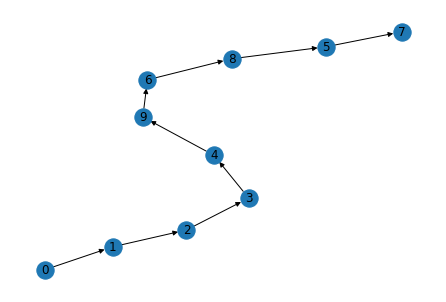

In [34]:
tree_dfs = nx.dfs_tree(petersen, 0)

# Now we plot the resulting tree
plot_graph(tree_dfs)
#plot_tree(tree_dfs)

----
### Shortest path with Dijkstra algorithm

Let us now move to the Dijkstra algorithm to find the shortest path between two points.


In [35]:
from random import random, choice
from networkx.utils import pairwise

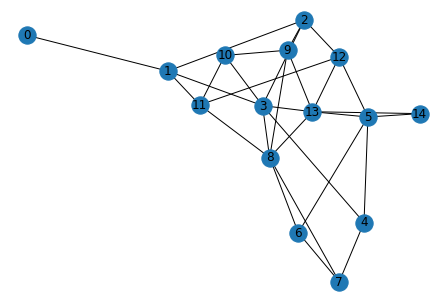

[0, 1, 3]


ImportError: requires pygraphviz http://pygraphviz.github.io/

In [36]:
G = nx.Graph()

n_nodes = 15

# Generate nodes from 0 to n_nodes-1
nodes = np.arange(n_nodes)
G.add_nodes_from(nodes)

# Build a path from nodes[0] to nodes[-1] to be sure it exists
for p1, p2 in pairwise(nodes):
    G.add_edge(p1, p2, weight=np.linalg.norm(p1-p2))

    
# Add other random edges
new_edges = 25
for _ in range(new_edges):
    p1, p2 = choice(nodes), choice(nodes)
    if p1 != nodes[0] and p2!= nodes[-1]:#avoid direct link
        G.add_edge(p1, p2, weight=np.linalg.norm(p1-p2))
    
    
plot_graph(G)


# Compute Dijistra path
path =  nx.dijkstra_path(G, nodes[0], nodes[3])
print(path)
plot_graph_and_highlight_dijistra(G, path)

---
### Exercise: Strongly Connected Components
The goal of this exercise is to implement the following algorithm to compute the strongly connected components of a directed graph $G$. [See here](https://www.hackerearth.com/practice/algorithms/graphs/strongly-connected-components/tutorial/). 

In a directed graph a component is strongly connected if there is a directed path from any vertex to every other vertex of the component. The problem asks to is to partition the graph into maximal strongly connected components.

NetworkX provides a method to compute the strongly connected components of a graph [here](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.strongly_connected_components.html#networkx.algorithms.components.strongly_connected_components). 

Your goal is to implement the Kosaraju's Linear time algorithm to find Strongly Connected Component. 
The algorithm is described [here](https://www.hackerearth.com/practice/algorithms/graphs/strongly-connected-components/tutorial).

It works in three steps. 

- Do a DFS on the original graph, keeping track of the DFS finish times of each node. This can be done with a stack, when some  finishes put the source vertex on the stack. This way node with highest finishing time will be on top of the stack.
- Reverse the original graph, i.e., if there is an edge $(u,v)$ in the original graph, add the edge $(v,u)$ in the reversed one.
-  Do DFS on the reversed graph, with the source vertex as the vertex on top of the stack. When DFS finishes, all nodes visited will form one Strongly Connected Component. If any more nodes remain unvisited, this means there are more Strongly Connected Component's, so pop vertices from top of the stack until a valid unvisited node is found. This will have the highest finishing time of all currently unvisited nodes.

Take a look at [DFS traversal documentation](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html#module-networkx.algorithms.traversal.depth_first_search).
Note that the finishing time of a node can be inferred from its position in the DFS tree. 



![alt text](scc.webp "Example")

In [1]:
## Your implementation goes here
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

def strongly_connected_components(G):
    
    components=[]
    dfs = list(nx.dfs_edges(DG))
    #1.time finished
    time=[]
    for i in dfs:
        if i[0] not in time:
            time.append(i[0])
        if i[1] not in time:
            time.append(i[1])

    #2.G!
    edge=DG.edges()
    edge2=[]
    for i in edge:
        edge2.append((i[1],i[0]))
    edge2
    DG2 = nx.DiGraph()
    DG2.add_edges_from(edge2)

    #plot_graph(DG2)
    #3.tree of G! time with G finsh
    while time!=[]:
        output_dfs=[]
        tree=[]
        dfs2 = list(nx.dfs_edges(DG2, time[0]))
        for j in dfs2:
            if j[0] not in output_dfs:
                output_dfs.append(j[0])
            if j[1] not in output_dfs:
                output_dfs.append(j[1])
            for i in output_dfs:
                if i in time:
                    time.remove(i)
                    tree.append(i)
        components.append(tree)
    print(components)

In [3]:
## Test your implementation here
DG = nx.DiGraph()
DG.add_edges_from([
    (0, 1), (1, 2), (2, 0), 
    (3, 4), (4, 5), (5, 3),
    (0, 5), (2, 3),(4,'A'),('A','B'),('B','C'),('C','A')
])
plot_graph(DG)
strongly_connected_components(DG)

NameError: name 'plot_graph' is not defined